In [2]:
import numpy as np
#import sympy as sy
import pylab as plt
from scipy.integrate import simps, odeint
from scipy.optimize import brentq

In [3]:
#konstante

AA=8.6375   #m/hbar
BB=13.12   #m/hbar**2
hbar=AA/BB
m=AA*hbar
V0 = 1.7 #1.8
V1 = 2.4 #2.1
a = 1.1
L = 4.3

# Analitičko rješenje

In [4]:
#uvjet energije parnih stanja - dobiven analitički
def uvjet_par(E):
    k1 = np.sqrt(-2*m/hbar**2*(E-V1))
    k2 = np.sqrt(2*m/hbar**2*(E))
    k3 = np.sqrt(-2*m/hbar**2*(E-V0))
    izraz1 = (+k1*np.sinh(k1*a)*np.cos(k2*a) + k2*np.cosh(k1*a)*np.sin(k2*a))*(k2*np.cos(k2*L)+k3*np.sin(k2*L))
    izraz2 = (-k2*np.cosh(k1*a)*np.cos(k2*a) + k1*np.sinh(k1*a)*np.sin(k2*a))*(k2*np.sin(k2*L) - k3*np.cos(k2*L))
    return (izraz1 + izraz2)

Text(0.5, 1.0, 'Energija parnih stanja')

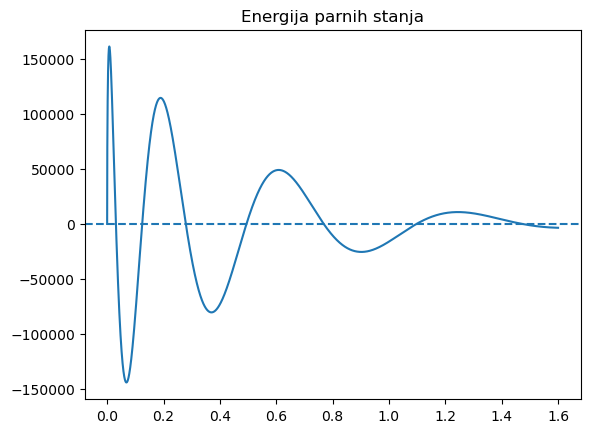

In [5]:
energ = np.arange(0, V0-0.1, 0.0001)
fja3=[uvjet_par(e) for e in energ]

plt.plot(energ, fja3)
plt.axhline(y=0, ls='--')
plt.title('Energija parnih stanja')



In [6]:
#uvjet energije neparnih stanja - dobiven analitički
def uvjet_nep(E):
    k1 = np.sqrt(-2*m/hbar**2*(E-V1))
    k2 = np.sqrt(2*m/hbar**2*(E))
    k3 = np.sqrt(-2*m/hbar**2*(E-V0))
    izraz1 = (k2*np.sinh(k1*a)*np.sin(k2*a)+k1*np.cosh(k1*a)*np.cos(k2*a))*(k3*np.sin(k2*L)+k2*np.cos(k2*L))
    izraz2 = (k1*np.cosh(k1*a)*np.sin(k2*a)-k2*np.sinh(k1*a)*np.cos(k2*a))*(k2*np.sin(k2*L)-k3*np.cos(k2*L))
    return izraz1 + izraz2
        

Text(0.5, 1.0, 'Energija neparnih stanja')

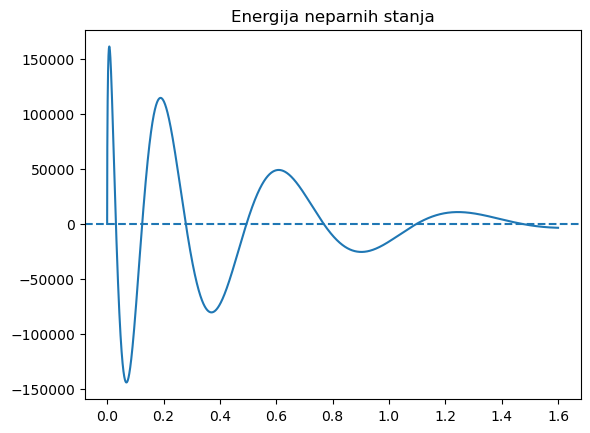

In [7]:
fja_nep = [uvjet_nep(e) for e in energ]

plt.plot(energ, fja_nep)
plt.axhline(y=0, ls='--')
plt.title('Energija neparnih stanja')

In [10]:
#energije kvantnih stanja - nultočke gornjih fja

E1 = brentq(uvjet_par, 0.01, 0.05)
print('Energija prvog stanja = ' + str(E1))

E2 = brentq(uvjet_nep, 0.01, 0.05)
print('Energija drugog stanja = ' + str(E2))

E3 = brentq(uvjet_par, 0.1, 0.2)
print('Energija trećeg stanja = ' + str(E3))

Energija prvog stanja = 0.031121360021027257
Energija drugog stanja = 0.031121360283773217
Energija trećeg stanja = 0.12432322592716805


In [11]:
#parne valne funkcije - dobivene analitički

def koeficijenti_parni(E):
    k1 = np.sqrt(-2*m/hbar**2*(E-V1))
    k2 = np.sqrt(2*m/hbar**2*(E))
    k3 = np.sqrt(-2*m/hbar**2*(E-V0))
    A=1
    C=(k1*np.sinh(k1*a) + k2*np.tan(k2*a)*np.cosh(k1*a))/(k2*np.tan(k2*a)*np.sin(k2*a) + k2*np.cos(k2*a))
    B=(np.cosh(k1*a)-C*np.sin(k2*a))/(np.cos(k2*a))
    D=np.exp(k3*L)*(B*np.cos(k2*L)+C*np.sin(k2*L))
        #print(D*k3*np.exp(-k3*L) - B*k2*np.sin(k2*L)+C*k2*np.cos(k2*L))  #provjera
    return A,B,C,D

def valna_parna(xx, E, A, B, C, D):
    x=np.abs(xx)
    k1 = np.sqrt(-2*m/hbar**2*(E-V1))
    k2 = np.sqrt(2*m/hbar**2*(E))
    k3 = np.sqrt(-2*m/hbar**2*(E-V0))
    if(x<a):
        return A*np.cosh(k1*x)
    elif(x<L):
        return B*np.cos(k2*x)+C*np.sin(k2*x)
    else:
        return D*np.exp(-k3*x)
            
def deriv_parna(xx, E, A,B,C,D):
    x=np.abs(xx)
    k1 = np.sqrt(-2*m/hbar**2*(E-V1))
    k2 = np.sqrt(2*m/hbar**2*(E))
    k3 = np.sqrt(-2*m/hbar**2*(E-V0))
    if(x<a):
        return k1*A*np.sinh(k1*x)
    elif(x<L):
        return -B*k2*np.sin(k2*x) + C*k2*np.cos(k2*x)
    else:
        return -k3*D*np.exp(-k3*x)

In [12]:
#parne valne funkcije - dobivene analitički

def koeficijenti_neparni(E):
    k1 = np.sqrt(-2*m/hbar**2*(E-V1))
    k2 = np.sqrt(2*m/hbar**2*(E))
    k3 = np.sqrt(-2*m/hbar**2*(E-V0))
    A=1
    C=(-k1*np.cosh(k1*a)-k2*np.tan(k2*a)*np.sinh(k1*a))/(-k2*np.tan(k2*a)*np.sin(k2*a) - k2*np.cos(k2*a))
    B=(np.sinh(k1*a)-C*np.sin(k2*a))/(np.cos(k2*a))
    D=np.exp(k3*L)*(B*np.cos(k2*L)+C*np.sin(k2*L))
    return A,B,C,D

def valna_neparna(xx, E, A, B, C, D):
    x=np.abs(xx)
    k1 = np.sqrt(-2*m/hbar**2*(E-V1))
    k2 = np.sqrt(2*m/hbar**2*(E))
    k3 = np.sqrt(-2*m/hbar**2*(E-V0))
    if(xx>=0):
        if(x<a):
            return A*np.sinh(k1*x)
        elif(x<L):
            return B*np.cos(k2*x)+C*np.sin(k2*x)
        else:
            return D*np.exp(-k3*x)
        
    else:
        if(x<a):
            return -A*np.sinh(k1*x)
        elif(x<L):
            return -B*np.cos(k2*x) - C*np.sin(k2*x)
        else:
            return -D*np.exp(-k3*x)
        
            
def deriv_neparna(xx, E, A,B,C,D):
    x=np.abs(xx)
    k1 = np.sqrt(-2*m/hbar**2*(E-V1))
    k2 = np.sqrt(2*m/hbar**2*(E))
    k3 = np.sqrt(-2*m/hbar**2*(E-V0))
    if(xx>=0):
        if(x<a):
            return k1*A*np.sinh(k1*x)
        elif(x<L):
            return -B*k2*np.sin(k2*x) + C*k2*np.cos(k2*x)
        else:
            return -k3*D*np.exp(-k3*x)
        
    else:
        if(x<a):
            return -k1*A*np.sinh(k1*x)
        elif(x<L):
            return B*k2*np.sin(k2*x) - C*k2*np.cos(k2*x)
        else:
            return k3*D*np.exp(-k3*x)
       

In [13]:
#potencijal

def potencijal(x):
    xx=np.abs(x)
    if(xx < a):
        return V1
    elif(xx<L):
        return 0
    else:
        return V0

In [14]:
koef1=koeficijenti_parni(E1)
koef2=koeficijenti_neparni(E2)
koef3=koeficijenti_parni(E3)

In [15]:
#valne fje

xmesh = np.arange(-1.5*L, 1.5*L, 0.01)
valna1 = [valna_parna(x, E1, koef1[0], koef1[1], koef1[2], koef1[3]) for x in xmesh]
valna2 = [valna_neparna(x, E2, koef2[0], koef2[1], koef2[2], koef2[3]) for x in xmesh]
valna3 = [valna_parna(x, E3, koef3[0], koef3[1], koef3[2], koef3[3]) for x in xmesh]
valna1=np.array(valna1)
valna2=np.array(valna2)
valna3=np.array(valna3)
norma1 = simps(valna1**2, xmesh)
norma2 = simps(valna2**2, xmesh)
norma3 = simps(valna3**2, xmesh)
valna1 = valna1/np.sqrt(norma1)
valna2 = valna2/np.sqrt(norma2)
valna3 = valna3/np.sqrt(norma3)
#simps(valna1**2, xmesh)

Text(0.5, 1.0, 'Osnovno stanje')

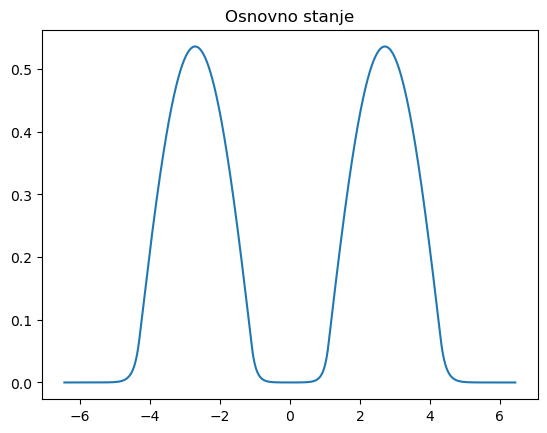

In [16]:
plt.plot(xmesh, valna1)
plt.title('Osnovno stanje')

Text(0.5, 1.0, 'Prvo pobuđeno stanje')

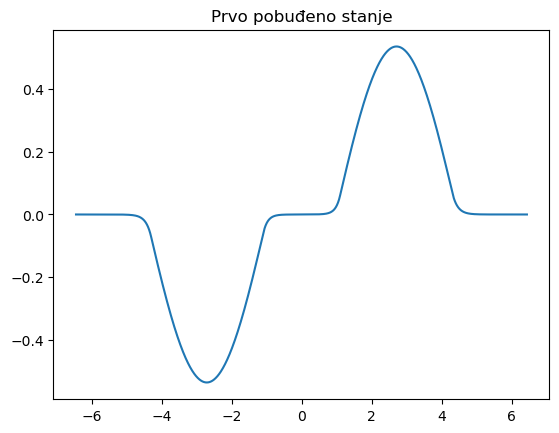

In [17]:
plt.plot(xmesh, valna2)
#xmesh[0]
plt.title('Prvo pobuđeno stanje')

Text(0.5, 1.0, 'Drugo pobuđeno stanje')

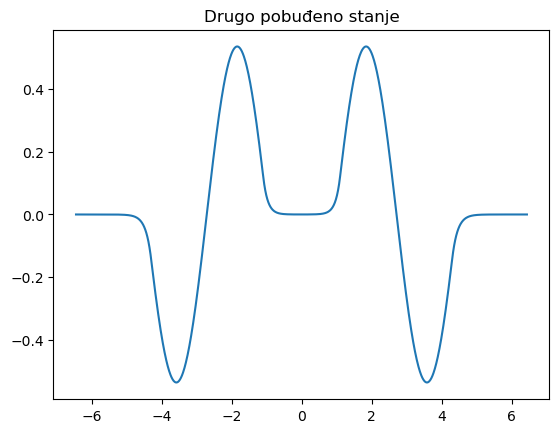

In [18]:
plt.plot(xmesh, valna3)
plt.title('Drugo pobuđeno stanje')

Text(0.5, 1.0, 'Valna funkcija prvog parnog stanja')

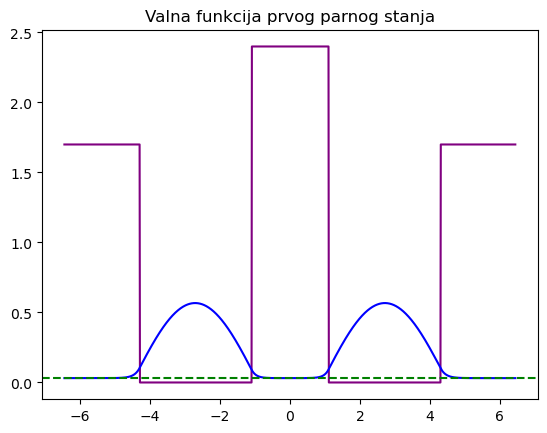

In [19]:
ypot = [potencijal(x) for x in xmesh]
plt.plot(xmesh, ypot, color='purple')
plt.plot(xmesh, valna1 + E1, color='blue')
plt.axhline(y=E1, ls='--', color='green')
plt.title('Valna funkcija prvog parnog stanja')

Text(0.5, 1.0, 'Valna funkcija prvog neparnog stanja')

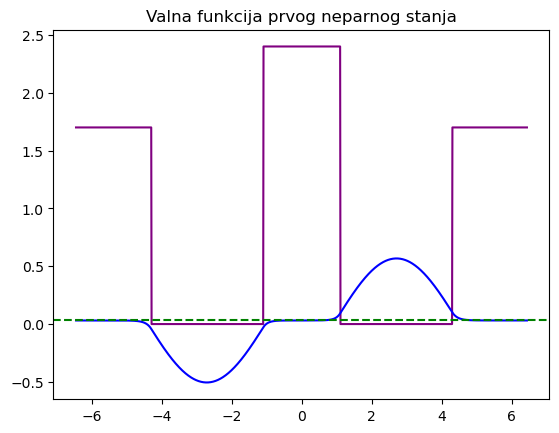

In [20]:
ypot = [potencijal(x) for x in xmesh]
plt.plot(xmesh, ypot, color='purple')
plt.plot(xmesh, valna2 + E2, color='blue')
plt.axhline(y=E2, ls='--', color='green')
plt.title('Valna funkcija prvog neparnog stanja')

Text(0.5, 1.0, 'Valna funkcija drugog parnog stanja')

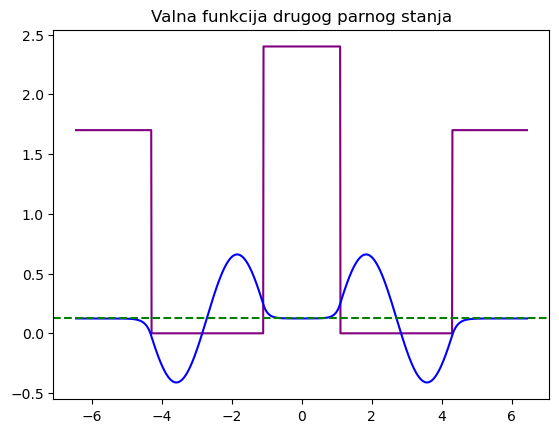

In [21]:
ypot = [potencijal(x) for x in xmesh]
plt.plot(xmesh, ypot, color='purple')
plt.plot(xmesh, valna3 + E3, color='blue')
plt.axhline(y=E3, ls='--', color='green')
plt.title('Valna funkcija drugog parnog stanja')

In [22]:
#očekivanje pomaka
xav_1=simps(xmesh*valna1**2,xmesh)
xav_2=simps(xmesh*valna2**2,xmesh)
xav_3=simps(xmesh*valna3**2,xmesh)
x2av_1=simps(xmesh**2*valna1**2,xmesh)
x2av_2=simps(xmesh**2*valna2**2,xmesh)
x2av_3=simps(xmesh**2*valna3**2,xmesh)
print('<x1>:', xav_1)
print('<x2>:',xav_2)
print('<x3>:',xav_3)
print('<x^2_1>:',x2av_1)
print('<x^2_2>:',x2av_2)
print('<x^2_3>:',x2av_3)

<x1>: -3.219370661093815e-16
<x2>: -2.1091476347196799e-16
<x3>: -1.458190777901147e-15
<x^2_1>: 7.75169448447399
<x^2_2>: 7.751694527675036
<x^2_3>: 8.219744660937755


In [23]:
#derivacije - dobivene analitički
d_valna1 = [deriv_parna(x, E1, koef1[0], koef1[1],koef1[2],koef1[3]) for x in xmesh]
d_valna1 = np.array(d_valna1)
d_valna1 = d_valna1/np.sqrt(norma1)  

d_valna2 = [deriv_neparna(x, E2, koef2[0], koef2[1],koef2[2],koef2[3]) for x in xmesh]
d_valna2 = np.array(d_valna2)
d_valna2 = d_valna2/np.sqrt(norma2)  

d_valna3 = [deriv_parna(x, E3, koef3[0], koef3[1],koef3[2],koef3[3]) for x in xmesh]
d_valna3 = np.array(d_valna3)
d_valna3 = d_valna3/np.sqrt(norma3) 

In [24]:
#očekivanje impulsa
pav_1=-1j*hbar*simps(valna1*d_valna1,xmesh)
p2av_1=+hbar**2*simps(d_valna1**2,xmesh)
print('<p_1>:',pav_1)
print('<p^2_1>:',p2av_1)
pav_2=-1j*hbar*simps(valna2*d_valna2,xmesh)
p2av_2=+hbar**2*simps(d_valna2**2,xmesh)
print('<p_2>:',pav_2)
print('<p^2_2>:',p2av_2)

pav_3=-1j*hbar*simps(valna3*d_valna3,xmesh)
p2av_3=+hbar**2*simps(d_valna3**2,xmesh)
print('<p_3>:',pav_3)
print('<p^2_3>:',p2av_3)

<p_1>: 9.181816288209034e-10j
<p^2_1>: 0.32570382303942813
<p_2>: 2.9831150984131297e-09j
<p^2_2>: 0.32570382745453064
<p_3>: 4.132981391970413e-09j
<p^2_3>: 1.2985083095874337


In [25]:
#neodređenosti
delta_x_1 = np.sqrt(x2av_1-xav_1**2)
delta_p_1 = np.sqrt(p2av_1 - pav_1**2) 
print('Produkt neodređenosti, osnovno stanje: ', np.real(delta_x_1*delta_p_1))

delta_x_2 = np.sqrt(x2av_2-xav_2**2)
delta_p_2 = np.sqrt(p2av_2-pav_2**2) 
print('Produkt neodređenosti, prvo neparno stanje: ', np.real(delta_x_2*delta_p_2))

delta_x_3 = np.sqrt(x2av_3-xav_3**2)
delta_p_3 = np.sqrt(p2av_3-pav_3**2) 
print('Produkt neodređenosti, drugo parno stanje: ', np.real(delta_x_3*delta_p_3))

print('Minimalna neodređenost:', hbar/2)


Produkt neodređenosti, osnovno stanje:  1.5889482460504583
Produkt neodređenosti, prvo neparno stanje:  1.5889482612477033
Produkt neodređenosti, drugo parno stanje:  3.2670180202922996
Minimalna neodređenost: 0.3291730182926829


# Shooting metoda

In [27]:
Xmin=0
Xmax=2*L
dx=a/100


par = 0.33
Xmatch= a + (L-a)*par
dx1=(Xmatch-Xmin)/100
xmesh1=np.arange(Xmin,Xmatch+dx1/2,dx1)
npts1=len(xmesh1)
#print(xmesh1[npts1-1])
dx2=(Xmax-Xmatch)/100
xmesh2=np.arange(Xmax,Xmatch-dx2/2,-dx2)
npts2=len(xmesh2)
#print(xmesh2[npts2-1])


def func(y,x,energija):
    psi=y[0]
    dpsi=y[1]
    v=potencijal(x)
    d2psi=(2*m/hbar**2)*(-energija+v)*psi
    return [dpsi,d2psi]

In [28]:
#shoot za parna stanja
def shoot(Energija):
    kap3=np.sqrt(2*m*(-Energija+V0)/hbar**2)
    ini=[1,0]
    sol1=odeint(func,ini,xmesh1,args=(Energija,))
    
    psi0=10**16*np.exp(-kap3*Xmax)
    dpsi0=-10**16**np.exp(-kap3*Xmax)
    ini=[psi0,dpsi0]
    sol2=odeint(func,ini,xmesh2,args=(Energija,))   
    
    sol2[npts2-1,1]=sol2[npts2-1,1]*(sol1[npts1-1,0]/sol2[npts2-1,0])
    
    diff = sol2[npts2-1,1]-sol1[npts1-1,1]
    
    return diff

#shoot za neparna stanja
def shoot2(Energija):
    kap3=np.sqrt(2*m*(-Energija+V0)/hbar**2)
    ini=[0,1]
    sol1=odeint(func,ini,xmesh1,args=(Energija,))
    
    psi0=10**16*np.exp(-kap3*Xmax)
    dpsi0=-10**16**np.exp(-kap3*Xmax)
    ini=[psi0,dpsi0]
    sol2=odeint(func,ini,xmesh2,args=(Energija,))   
    
    sol2[npts2-1,1]=sol2[npts2-1,1]*(sol1[npts1-1,0]/sol2[npts2-1,0])
    
    diff = sol2[npts2-1,1]-sol1[npts1-1,1]
    
    return diff

In [29]:
E1=brentq(shoot, 0.02, 0.04)
print('E1 =', E1)

E2=brentq(shoot, 0.02, 0.04)
print('E2 =', E2)

E3=brentq(shoot, 0.1, 0.3)
print('E3 =', E3)

E1 = 0.031121360227928857
E2 = 0.031121360227928857
E3 = 0.12432322724384204


In [30]:
Energija= E1
kap3=np.sqrt(2*m*(-Energija+V0)/hbar**2)
ini=[1,0]
sol1=odeint(func,ini,xmesh1,args=(Energija,))
    
psi0=10**16*np.exp(-kap3*Xmax)
dpsi0=-10**16**np.exp(-kap3*Xmax)
ini=[psi0,dpsi0]
sol2=odeint(func,ini,xmesh2,args=(Energija,))
sol2[:,0]=(sol1[npts1-1,0]/sol2[npts2-1,0])*sol2[:,0]

xmeshM1 = -xmesh1
xmeshM2 = -xmesh2

wf_left=sol1[:,0]
wf_right=sol2[:,0]
norma1 = simps(wf_left ** 2, xmesh1) - simps(wf_right ** 2, xmesh2)
wf_left=wf_left/np.sqrt(2*norma1)
wf_right=wf_right/np.sqrt(2*norma1)

Text(0.5, 1.0, 'Osnovno stanje')

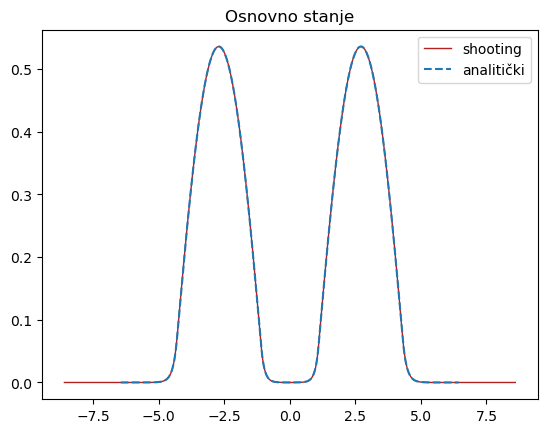

In [31]:
plt.plot(xmesh1, wf_left,color='firebrick',lw=1,ls='-',label='shooting')
plt.plot(xmesh2, wf_right,color='firebrick',lw=1,ls='-')
plt.plot(xmeshM1, wf_left,color='firebrick',lw=1,ls='-')
plt.plot(xmeshM2, wf_right,color='firebrick',lw=1,ls='-')
plt.plot(xmesh, valna1, ls='--', label='analitički')
plt.legend()
plt.title('Osnovno stanje')

In [32]:
xav_1=2*(simps(xmesh1*wf_left**2, xmesh1) - simps(xmesh2*wf_right**2, xmesh2))
x2av_1=2*(simps(xmesh1**2*wf_left**2, xmesh1) - simps(xmesh2**2*wf_right**2, xmesh2))
x2av_1

7.751738009983184

Text(0.5, 1.0, 'Prvo neparno stanje')

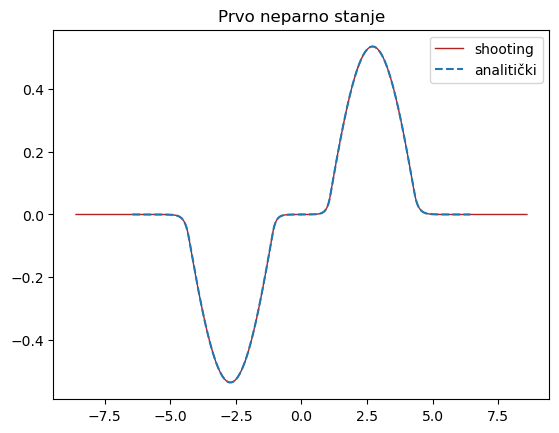

In [33]:
Energija= E2
kap3=np.sqrt(2*m*(-Energija+V0)/hbar**2)
ini=[0,1]
sol1=odeint(func,ini,xmesh1,args=(Energija,))
    
psi0=10**16*np.exp(-kap3*Xmax)
dpsi0=-10**16**np.exp(-kap3*Xmax)
ini=[psi0,dpsi0]
sol2=odeint(func,ini,xmesh2,args=(Energija,))
sol2[:,0]=(sol1[npts1-1,0]/sol2[npts2-1,0])*sol2[:,0]

xmeshM1 = -xmesh1
xmeshM2 = -xmesh2

wf_left=sol1[:,0]
wf_right=sol2[:,0]
norma1 = simps(wf_left ** 2, xmesh1) - simps(wf_right ** 2, xmesh2)
wf_left=wf_left/np.sqrt(2*norma1)
wf_right=wf_right/np.sqrt(2*norma1)

plt.plot(xmesh1, wf_left,color='firebrick',lw=1,ls='-',label='shooting')
plt.plot(xmesh2, wf_right,color='firebrick',lw=1,ls='-')
plt.plot(xmeshM1, -wf_left,color='firebrick',lw=1,ls='-')
plt.plot(xmeshM2, -wf_right,color='firebrick',lw=1,ls='-')
plt.plot(xmesh, valna2, ls='--', label='analitički')
plt.legend()
plt.title('Prvo neparno stanje')

In [34]:
xav_2=2*(simps(xmesh1*wf_left**2, xmesh1) - simps(xmesh2*wf_right**2, xmesh2))
x2av_2=2*(simps(xmesh1**2*wf_left**2, xmesh1) - simps(xmesh2**2*wf_right**2, xmesh2))
x2av_2

7.751738036319661

Text(0.5, 1.0, 'Drugo parno stanje')

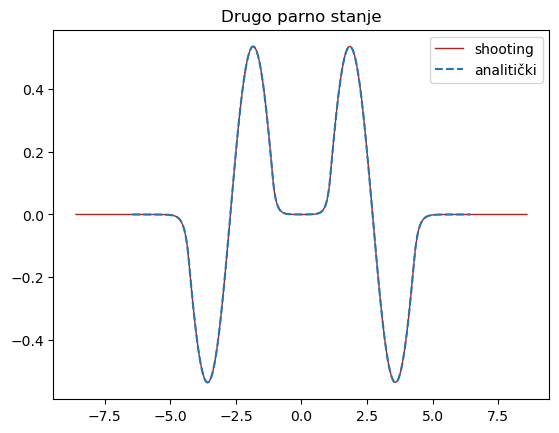

In [35]:
Energija= E3
kap3=np.sqrt(2*m*(-Energija+V0)/hbar**2)
ini=[1,0]
sol1=odeint(func,ini,xmesh1,args=(Energija,))
    
psi0=10**16*np.exp(-kap3*Xmax)
dpsi0=-10**16**np.exp(-kap3*Xmax)
ini=[psi0,dpsi0]
sol2=odeint(func,ini,xmesh2,args=(Energija,))
sol2[:,0]=(sol1[npts1-1,0]/sol2[npts2-1,0])*sol2[:,0]

xmeshM1 = -xmesh1
xmeshM2 = -xmesh2

wf_left=sol1[:,0]
wf_right=sol2[:,0]
norma1 = simps(wf_left ** 2, xmesh1) - simps(wf_right ** 2, xmesh2)
wf_left=wf_left/np.sqrt(2*norma1)
wf_right=wf_right/np.sqrt(2*norma1)

plt.plot(xmesh1, wf_left,color='firebrick',lw=1,ls='-',label='shooting')
plt.plot(xmesh2, wf_right,color='firebrick',lw=1,ls='-')
plt.plot(xmeshM1, wf_left,color='firebrick',lw=1,ls='-')
plt.plot(xmeshM2, wf_right,color='firebrick',lw=1,ls='-')
plt.plot(xmesh, valna3, ls='--', label='analitički')
plt.legend()
plt.title('Drugo parno stanje')

In [36]:
xav_3=2*(simps(xmesh1*wf_left**2, xmesh1) - simps(xmesh2*wf_right**2, xmesh2))
x2av_3=2*(simps(xmesh1**2*wf_left**2, xmesh1) - simps(xmesh2**2*wf_right**2, xmesh2))
x2av_3

8.219921712812091

Što ako središnji potencijal teži u delta funkciju?
Znamo da za delta funkciju valna funkcija ima prekid u derivaciji na mjestu delte.
Ako pogledamo recimo osnovno stanje, ono na dobrom dijelu područja |x|<a je ravno, konstantno. Ako se potencijal sužava, to područje postaje manje, u limesu beskonačno uskog tog područja nema pa nema kontinuiranog prijelaza derivacije, već bude skok u nuli. Sama energija osnovnog stanja se smanjuje(može se vidjet i numerički, delta fju dobimo ako držimo konstantim produkt V1*a, a puštamo a u nulu.)